In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
bf=pd.read_csv('/content/BF Data.csv')

In [3]:
bf.head(5)

,DATE,PRODUCTION,COKE RATE,PRODUCTIVITY,CDI RATE,SLAG RATE,SINTER %,HBT,TOP PR.,MOISTURE %(T/Hr),...,Avg.%S in HM,COKE ASH,-5mm in sinter,AVAIL. %,Blast VOL.,BLAST PR.,Total slag,I/ore,Sinter,RAFT (?C)
0,01-May-23,7606,398,2.21,137,613,56.6,1178,2.26,6.7,...,0.036,14.5,8.7,100.0,6086,4.09,4664,1842,8315,2213
1,02-May-23,7416,397,2.15,137,629,65.8,1181,2.26,7.9,...,0.034,14.1,5.9,100.0,6027,4.04,4659,1456,8354,2206
2,03-May-23,6710,422,1.95,116,642,64.3,1180,2.28,10.3,...,0.026,14.2,6.4,100.0,6010,4.02,4307,1938,7739,2072
3,04-May-23,8004,415,2.32,125,630,62.0,1180,2.27,8.7,...,0.022,14.6,7.5,100.0,6353,4.09,5042,2295,8497,2196
4,05-May-23,7833,394,2.27,142,634,61.2,1181,2.27,8.5,...,0.033,14.5,15.0,100.0,6065,4.08,4964,2627,8061,2176


In [4]:
bf.columns

Index(['DATE', 'PRODUCTION', 'COKE RATE', 'PRODUCTIVITY', 'CDI RATE',
       'SLAG RATE', 'SINTER %', 'HBT', 'TOP PR.', 'MOISTURE %(T/Hr)', 'T. D. ',
       'TD% (Hour/24)', 'N/D CAST %', 'O2 %', 'Avg.%Si in HM', 'Avg.%S in HM',
       'COKE ASH', '-5mm in sinter', 'AVAIL. %', 'Blast VOL.', 'BLAST PR.',
       'Total slag', 'I/ore', 'Sinter', 'RAFT (?C)'],
      dtype='object')

In [5]:
bf.isnull().sum()

DATE                0
PRODUCTION          0
COKE RATE           0
PRODUCTIVITY        0
CDI RATE            0
SLAG RATE           0
SINTER %            0
HBT                 0
TOP PR.             0
MOISTURE %(T/Hr)    0
T. D.               0
TD% (Hour/24)       0
N/D CAST %          0
O2 %                0
Avg.%Si in HM       0
Avg.%S in HM        0
COKE ASH            0
-5mm in sinter      0
AVAIL. %            0
Blast VOL.          0
BLAST PR.           0
Total slag          0
I/ore               0
Sinter              0
RAFT (?C)           0
dtype: int64

In [6]:
bf.shape

(35, 25)

<Axes: xlabel='PRODUCTION', ylabel='Count'>

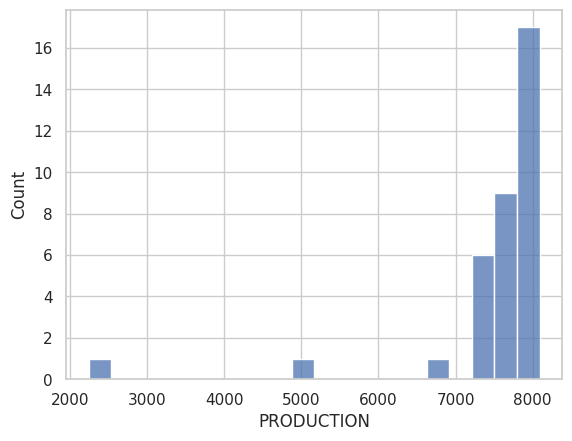

In [125]:
sns.histplot(bf["PRODUCTION"])

<Figure size 1500x600 with 0 Axes>

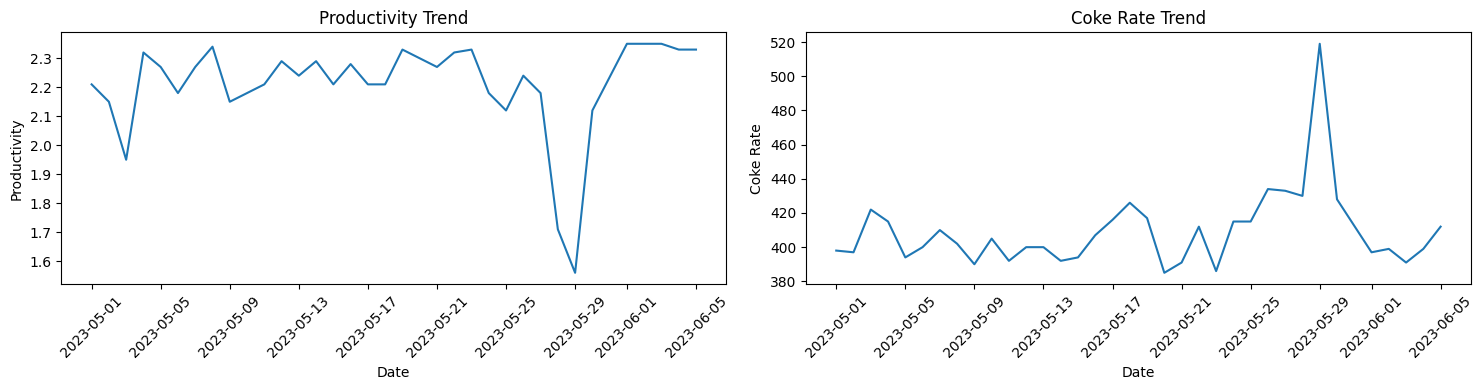

In [29]:
bf['DATE'] = pd.to_datetime(bf['DATE'])


plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# First Subplot: Production
sns.lineplot(x='DATE', y='PRODUCTIVITY', data=bf, ax=axes[0])
axes[0].set_xticks(axes[0].get_xticks())  # Ensure x-axis ticks are visible
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Productivity')
axes[0].set_title('Productivity Trend')

# Second Subplot: Coke Rate
sns.lineplot(x='DATE', y='COKE RATE', data=bf, ax=axes[1])
axes[1].set_xticks(axes[1].get_xticks())  # Ensure x-axis ticks are visible
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Coke Rate')
axes[1].set_title('Coke Rate Trend')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



In [31]:
# Calculate the correlation coefficient
correlation_coefficient = bf['PRODUCTION'].corr(bf['COKE RATE'])

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    interpretation = "There is a positive correlation between PRODUCTION and COKE RATE."
elif correlation_coefficient < 0:
    interpretation = "There is a negative (inverse) correlation between PRODUCTION and COKE RATE."
else:
    interpretation = "There is no linear correlation between PRODUCTION and COKE RATE."

print("Correlation Coefficient:", correlation_coefficient)
print("Interpretation:", interpretation)


Correlation Coefficient: -0.826025646128672
Interpretation: There is a negative (inverse) correlation between PRODUCTION and COKE RATE.


In [40]:
bf.columns

Index(['DATE', 'PRODUCTION', 'COKE RATE', 'PRODUCTIVITY', 'CDI RATE',
       'SLAG RATE', 'SINTER %', 'HBT', 'TOP PR.', 'MOISTURE %(T/Hr)', 'T. D. ',
       'TD% (Hour/24)', 'N/D CAST %', 'O2 %', 'Avg.%Si in HM', 'Avg.%S in HM',
       'COKE ASH', '-5mm in sinter', 'AVAIL. %', 'Blast VOL.', 'BLAST PR.',
       'Total slag', 'I/ore', 'Sinter', 'RAFT (?C)'],
      dtype='object')

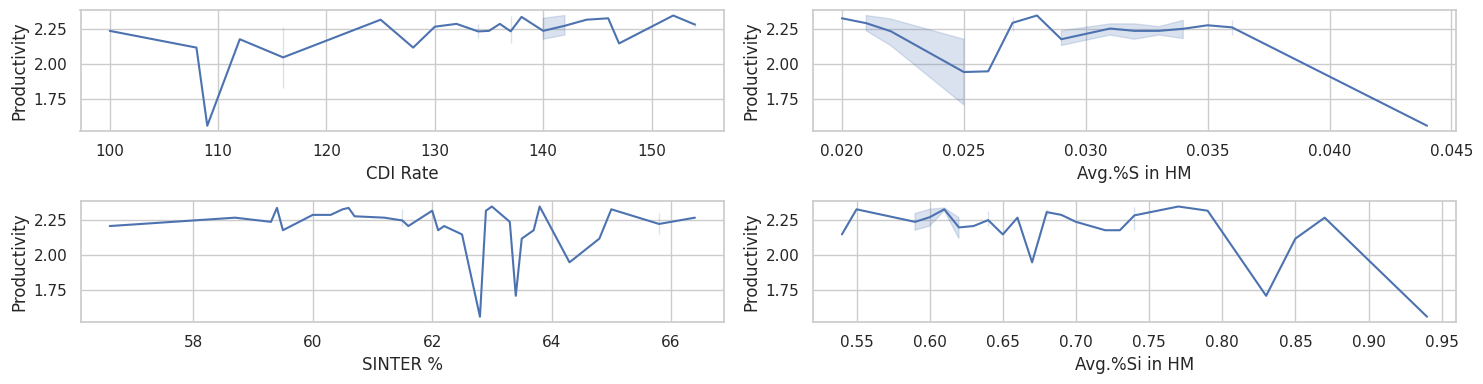

In [117]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 4))

# Plot the line chart for each subplot
sns.lineplot(y="PRODUCTIVITY", x="CDI RATE", data=bf, ax=axes[0, 0])
sns.lineplot(y="PRODUCTIVITY", x="Avg.%S in HM", data=bf, ax=axes[0, 1])
sns.lineplot(y="PRODUCTIVITY", x="SINTER %", data=bf, ax=axes[1, 0])
sns.lineplot(y="PRODUCTIVITY", x="Avg.%Si in HM", data=bf, ax=axes[1, 1])

# Label the axes
axes[0, 0].set_xlabel("CDI Rate")
axes[0, 0].set_ylabel("Productivity")
axes[0, 1].set_xlabel("Avg.%S in HM")
axes[0, 1].set_ylabel("Productivity")
axes[1, 0].set_xlabel("SINTER %")
axes[1, 0].set_ylabel("Productivity")
axes[1, 1].set_xlabel("Avg.%Si in HM")
axes[1, 1].set_ylabel("Productivity")

# Show the plot
plt.tight_layout()
plt.show()


* Productivity increases with increase in CDI Rate and Sinter %
* Productivity decrease with increase in Avg.%S and Avg. %Si in HM



In [128]:
# PRODUCTIVITY
# Separate independent variables (X) and dependent variable (y)
X = bf[[ 'CDI RATE',
       'SLAG RATE', 'SINTER %', 'HBT', 'TOP PR.', 'MOISTURE %(T/Hr)',
       'TD% (Hour/24)', 'O2 %', 'Avg.%Si in HM', 'Avg.%S in HM',
       'COKE ASH', '-5mm in sinter', 'AVAIL. %', 'Blast VOL.', 'BLAST PR.',
       'Total slag', 'I/ore', 'Sinter', 'RAFT (?C)']]
y = bf['PRODUCTIVITY']

# Add a constant term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# View regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PRODUCTIVITY   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     24.14
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           5.59e-08
Time:                        20:07:05   Log-Likelihood:                 73.631
No. Observations:                  35   AIC:                            -107.3
Df Residuals:                      15   BIC:                            -76.15
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7652      1.471  

Text(0.5, 1.0, 'Residuals vs Fitted')

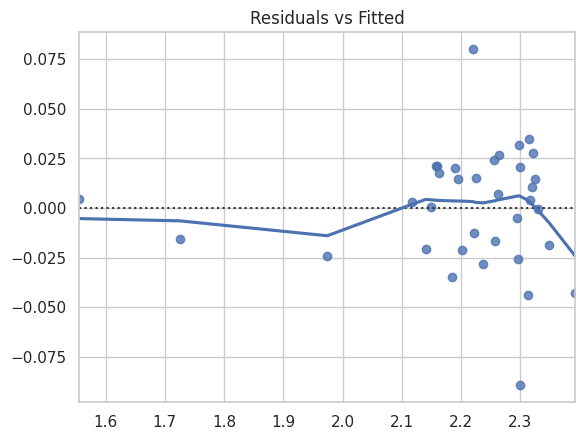

In [132]:
# Calculate the residuals
residuals = model.resid

# Residuals vs Fitted plot
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True)
plt.title("Residuals vs Fitted")


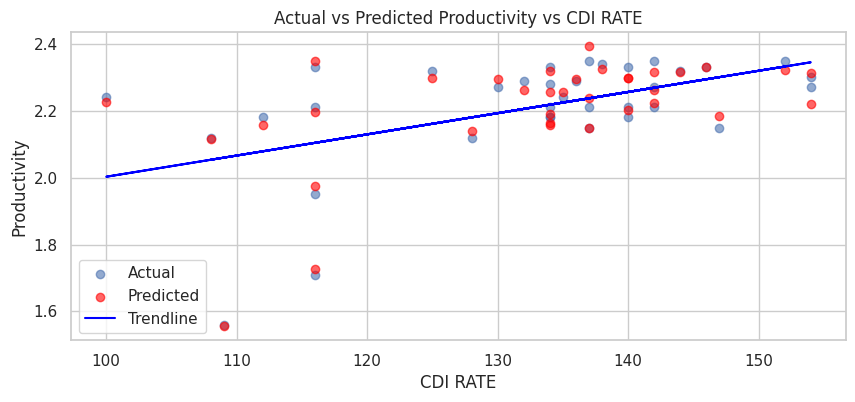

In [139]:
# Get the predicted values
predicted_values = model.predict(X)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 4))
plt.scatter(X['CDI RATE'], y, label='Actual', alpha=0.6)
plt.scatter(X['CDI RATE'], predicted_values, color='red', label='Predicted', alpha=0.6)
plt.xlabel('CDI RATE')
plt.ylabel('Productivity')
plt.title('Actual vs Predicted Productivity vs CDI RATE')
plt.legend()
plt.grid(True)

# Add a trendline
trendline = np.polyfit(X['CDI RATE'], y, 1)
plt.plot(X['CDI RATE'], np.polyval(trendline, X['CDI RATE']), color='blue', label='Trendline')

plt.legend()
plt.show()


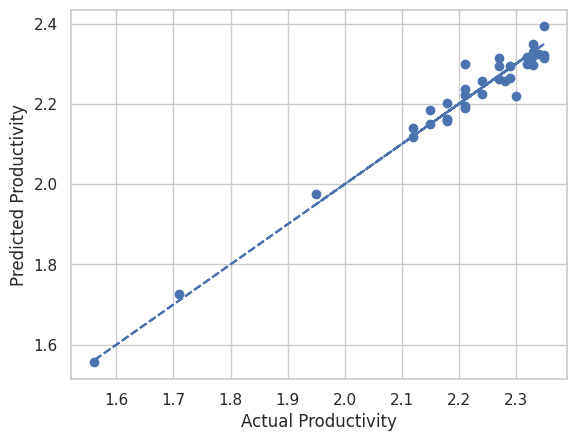

In [141]:
# Predict the productivity
predicted_productivity = model.predict(X)

# Plot the predicted productivity vs actual productivity
plt.scatter(y, predicted_productivity)
plt.plot(y, y, linestyle='--')
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.show()

In [71]:
# Significance Levels
p_values = model.pvalues
for idx, p_value in enumerate(p_values):
    print(f"P-value for {X.columns[idx]}: {p_value:.4f}")
    if p_value < 0.05:
        print(f"{X.columns[idx]} is statistically significant.")
    else:
        print(f"{X.columns[idx]} is not statistically significant.")

P-value for const: 0.2486
const is not statistically significant.
P-value for CDI RATE: 0.9681
CDI RATE is not statistically significant.
P-value for SLAG RATE: 0.0326
SLAG RATE is statistically significant.
P-value for SINTER %: 0.9287
SINTER % is not statistically significant.
P-value for HBT: 0.5774
HBT is not statistically significant.
P-value for TOP PR.: 0.6640
TOP PR. is not statistically significant.
P-value for MOISTURE %(T/Hr): 0.9626
MOISTURE %(T/Hr) is not statistically significant.
P-value for TD% (Hour/24): 0.9119
TD% (Hour/24) is not statistically significant.
P-value for O2 %: 0.1063
O2 % is not statistically significant.
P-value for Avg.%Si in HM: 0.7462
Avg.%Si in HM is not statistically significant.
P-value for Avg.%S in HM: 0.9030
Avg.%S in HM is not statistically significant.
P-value for COKE ASH: 0.8515
COKE ASH is not statistically significant.
P-value for -5mm in sinter: 0.9146
-5mm in sinter is not statistically significant.
P-value for AVAIL. %: 0.1365
AVAIL. 

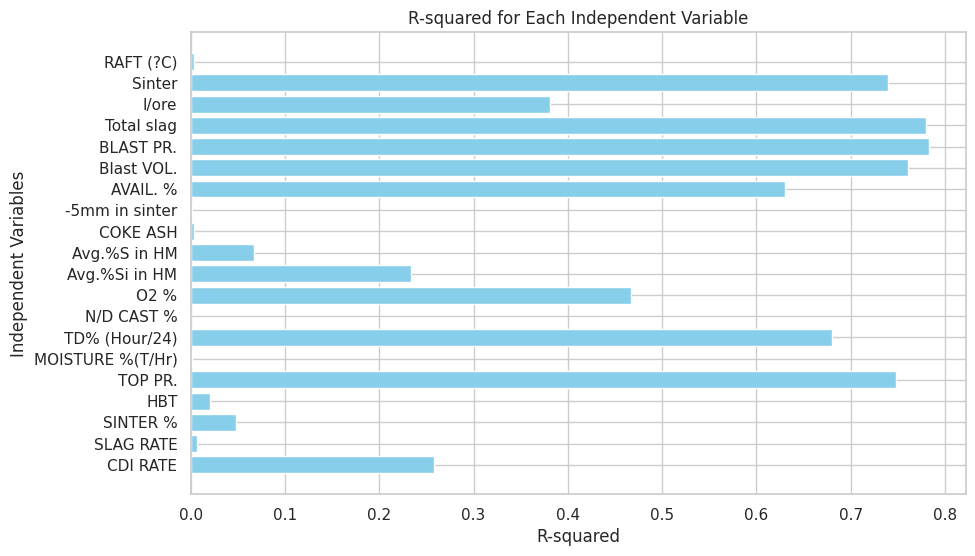

In [74]:
# Initialize a list to store R-squared values
rsquared_values = []

# Loop through each independent variable
for var in independent_vars:
    X = bf[var]
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Append the R-squared value to the list
    rsquared_values.append(model.rsquared)

# Create an R-squared plot
plt.figure(figsize=(10, 6))
plt.barh(independent_vars, rsquared_values, color='skyblue')
plt.xlabel('R-squared')
plt.ylabel('Independent Variables')
plt.title('R-squared for Each Independent Variable')
plt.show()

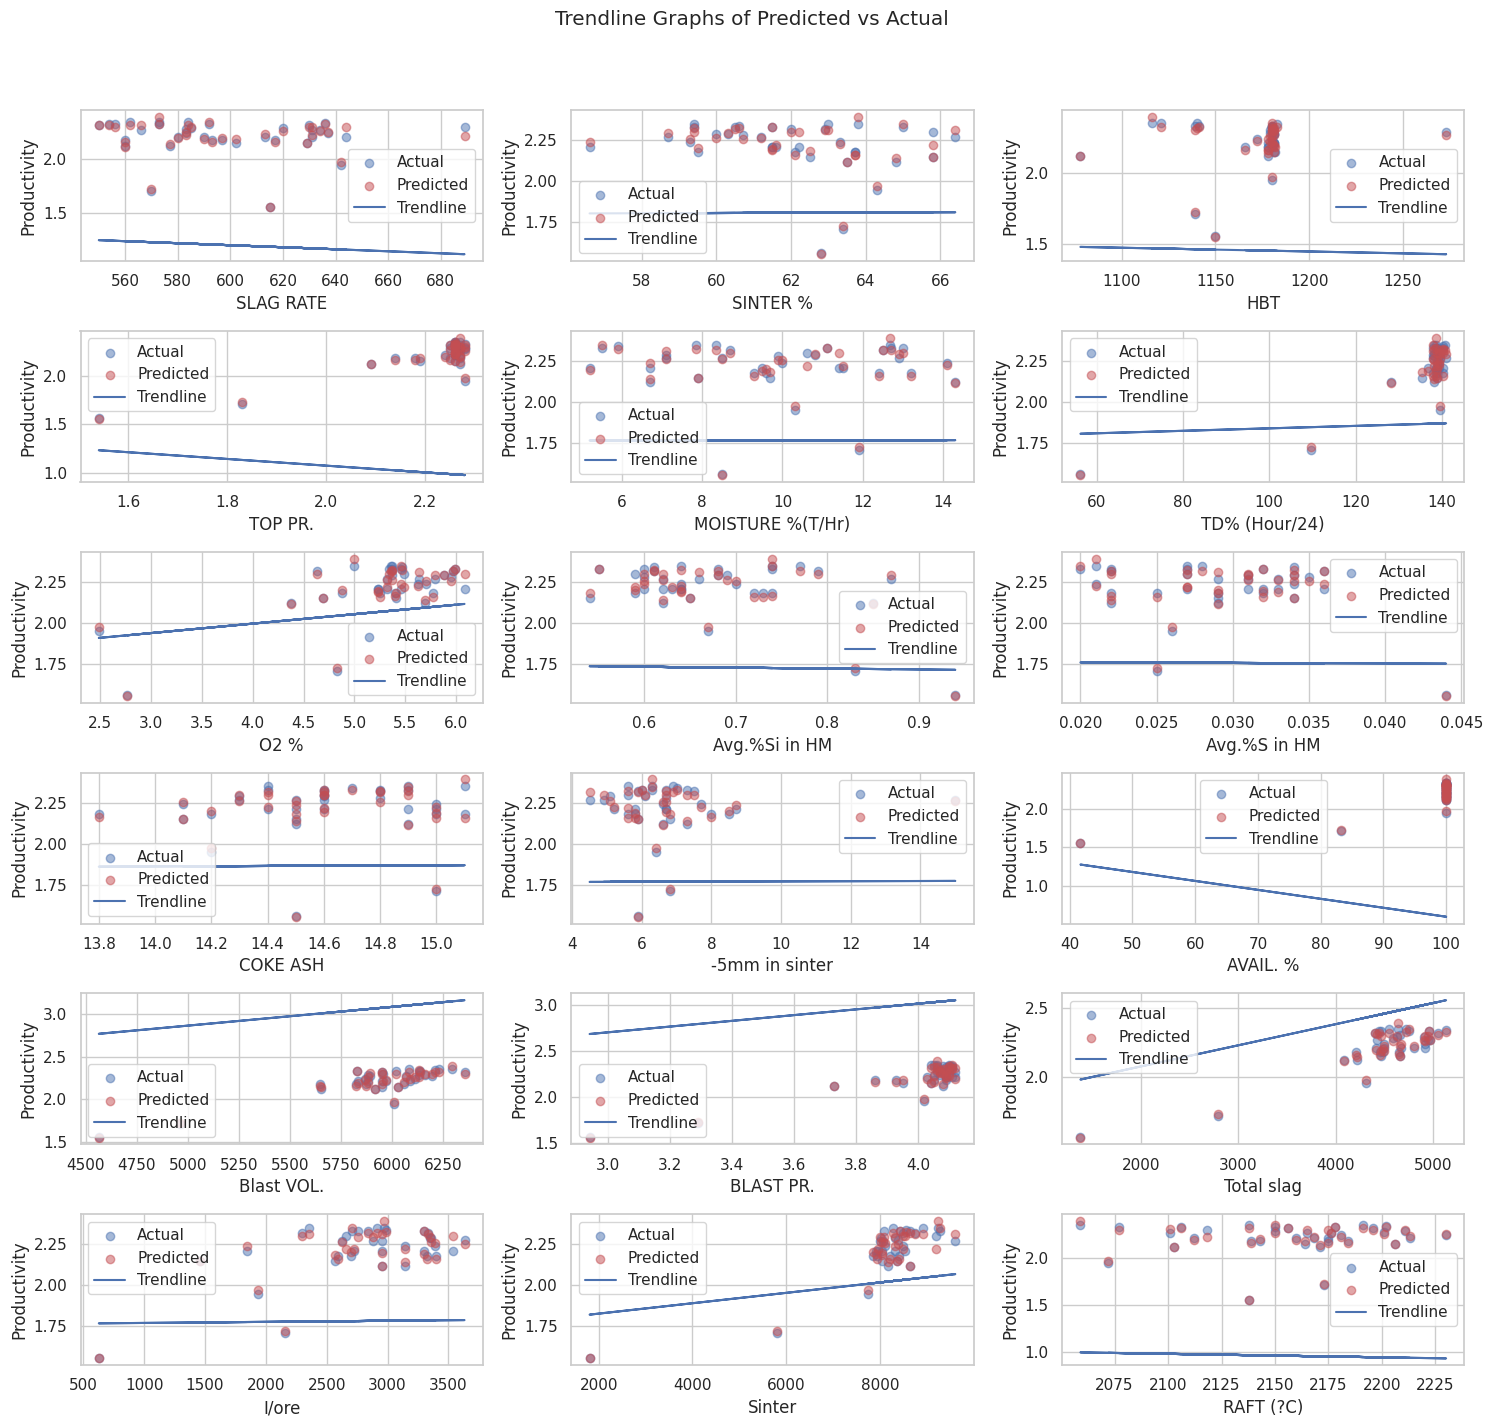

In [137]:
# Separate independent variables (X) and dependent variable (y)
X = bf[[ 'CDI RATE',
       'SLAG RATE', 'SINTER %', 'HBT', 'TOP PR.', 'MOISTURE %(T/Hr)',
       'TD% (Hour/24)', 'O2 %', 'Avg.%Si in HM', 'Avg.%S in HM',
       'COKE ASH', '-5mm in sinter', 'AVAIL. %', 'Blast VOL.', 'BLAST PR.',
       'Total slag', 'I/ore', 'Sinter', 'RAFT (?C)']]
y = bf['PRODUCTIVITY']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicted values from the model
predicted = model.predict(X)

# Plotting the trendline graphs
num_variables = X.shape[1] - 1  # Number of independent variables (excluding the constant)
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(num_variables / num_cols))  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle("Trendline Graphs of Predicted vs Actual")

variable_names = X.columns[1:]  # Names of independent variables

for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        ax.scatter(X.iloc[:, i + 1], y, label="Actual", alpha=0.5)
        ax.scatter(X.iloc[:, i + 1], predicted, color='r', label="Predicted", alpha=0.5)

        # Calculate and plot the trendline
        trendline_x = X.iloc[:, i + 1]
        trendline_y = model.coef_[i + 1] * trendline_x + model.intercept_
        ax.plot(trendline_x, trendline_y, color='b', label="Trendline")

        ax.set_xlabel(variable_names[i])
        ax.set_ylabel("Productivity")
        ax.legend()
    else:
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()